In [8]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as ppt
from sklearn import linear_model
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from linearmodels import OLS
import evaluation_functions

## Create data

In [22]:
# Create data
df_data = pd.DataFrame(index=range(100))
a_true = 10.
b_true = 2.
sigma = 1.
df_data['x'] = np.random.randint(0, 10, df_data.shape[0])
df_data['eps'] = np.random.normal(0, sigma, df_data.shape[0])
df_data['y'] = a_true + b_true*df_data['x'] + df_data['eps']
df_data.head()

,x,eps,y
0,4,-1.056967,16.943033
1,4,0.130269,18.130269
2,4,-1.837325,16.162675
3,1,-1.137254,10.862746
4,7,-2.099389,21.900611


## Estimate model

In [23]:
exog = df_data['x']
exog = sm.add_constant(exog)
endog = df_data['y']
mod = OLS(endog, exog) #, entity_effects=True,time_effects=True)
res = mod.fit() #cov_type='clustered', cluster_entity=True)
a_est = res.params[0]
b_est = res.params[1]
print(res)

                            OLS Estimation Summary                            
Dep. Variable:                      y   R-squared:                      0.9631
Estimator:                        OLS   Adj. R-squared:                 0.9628
No. Observations:                 100   F-statistic:                    2021.7
Date:                Fri, Jul 09 2021   P-value (F-stat)                0.0000
Time:                        09:55:06   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          9.8717     0.2025     48.756     0.0000      9.4749      10.269
x              1.9984     0.0444     44.964     0.00

## Plot data and model

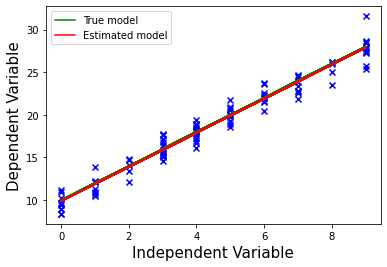

In [24]:
fig, ax = ppt.subplots()
ax.scatter(df_data['x'], df_data['y'], marker='x', color = 'blue')
ax.plot(df_data['x'], a_true + b_true*df_data['x'], color='green', label='True model')
ax.plot(df_data['x'], a_est + b_est*df_data['x'], color='red', label='Estimated model')
ax.set_xlabel('Independent Variable', fontsize = 15)
ax.set_ylabel('Dependent Variable', fontsize = 15)
ppt.legend()
ppt.show()